# Deep Learning with Pytorch: A 60 Minutes Blitz 

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

## What's Pytorch

### 1 Getting started

### 1.1 Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

In [3]:
from __future__ import print_function
import torch

Construct a 5x3 matrix, uninitialized:

In [4]:
print(torch.__version__)

0.3.1.post2


In [5]:
x = torch.Tensor(5,3); x


1.00000e-42 *
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  1.4798  0.0000
  0.0000  0.5577  0.0000
[torch.FloatTensor of size 5x3]

Construct a randomly initialized matrix:

In [6]:
x = torch.rand(5,3); x # Returns a tensor filled with random numbers from a uniform distribution on the interval [0,1)


 0.6226  0.8266  0.3955
 0.7972  0.6164  0.9152
 0.5178  0.6741  0.4506
 0.5908  0.7700  0.3202
 0.3578  0.5356  0.9206
[torch.FloatTensor of size 5x3]

In [7]:
x.size()

torch.Size([5, 3])

Note:
- torch.Size is in fact a tuple, so it supports all tuple operations.

###  1.2 Operations

In [8]:
y = torch.rand(5,3);y


 0.2481  0.1875  0.2823
 0.4857  0.3078  0.6057
 0.3550  0.4367  0.2077
 0.6171  0.1952  0.5085
 0.6090  0.4724  0.1952
[torch.FloatTensor of size 5x3]

In [9]:
x+y


 0.8706  1.0141  0.6779
 1.2829  0.9242  1.5209
 0.8728  1.1108  0.6584
 1.2079  0.9652  0.8287
 0.9668  1.0081  1.1158
[torch.FloatTensor of size 5x3]

In [10]:
torch.add(x,y)


 0.8706  1.0141  0.6779
 1.2829  0.9242  1.5209
 0.8728  1.1108  0.6584
 1.2079  0.9652  0.8287
 0.9668  1.0081  1.1158
[torch.FloatTensor of size 5x3]

In [11]:
result = torch.Tensor(5,3)
torch.add(x,y,out=result)
result


 0.8706  1.0141  0.6779
 1.2829  0.9242  1.5209
 0.8728  1.1108  0.6584
 1.2079  0.9652  0.8287
 0.9668  1.0081  1.1158
[torch.FloatTensor of size 5x3]

In [12]:
# Any operation that mutates a tensor in-place is post-fixed with an _. For example: x.copy_(y), x.t_(), will change x.
y.add_(x)
y


 0.8706  1.0141  0.6779
 1.2829  0.9242  1.5209
 0.8728  1.1108  0.6584
 1.2079  0.9652  0.8287
 0.9668  1.0081  1.1158
[torch.FloatTensor of size 5x3]

You can use standard NumPy-like indexing with all bells and whistles!

In [13]:
x[:,1]


 0.8266
 0.6164
 0.6741
 0.7700
 0.5356
[torch.FloatTensor of size 5]

In [14]:
x[:,1].size()

torch.Size([5])

Resizing: If you want to resize/reshape tensor, you can use torch.view:

In [15]:
x = torch.randn(4,4); x # Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1 (also called the standard normal distribution).


 0.9926 -0.9778 -0.1957  0.6659
 0.3114 -0.3543 -1.1168 -0.2368
 0.0806  1.4061 -0.4829  0.0666
-2.0539  1.2236  0.1225  1.3195
[torch.FloatTensor of size 4x4]

In [16]:
y = x.view(16); y


 0.9926
-0.9778
-0.1957
 0.6659
 0.3114
-0.3543
-1.1168
-0.2368
 0.0806
 1.4061
-0.4829
 0.0666
-2.0539
 1.2236
 0.1225
 1.3195
[torch.FloatTensor of size 16]

In [17]:
z = x.view(-1, 8); z


 0.9926 -0.9778 -0.1957  0.6659  0.3114 -0.3543 -1.1168 -0.2368
 0.0806  1.4061 -0.4829  0.0666 -2.0539  1.2236  0.1225  1.3195
[torch.FloatTensor of size 2x8]

In [18]:
x.size(), y.size(), z.size()

(torch.Size([4, 4]), torch.Size([16]), torch.Size([2, 8]))

Read later:

- 100+ Tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc., are described here http://pytorch.org/docs/torch

### 2 Numpy Bridge

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory locations, and changing one will change the other.

### 2.1 Converting a Torch Tensor to a NumPy Array

In [19]:
a = torch.ones(5); a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [20]:
b = a.numpy(); b

array([1., 1., 1., 1., 1.], dtype=float32)

In [21]:
a.size(), b.shape

(torch.Size([5]), (5,))

In [22]:
a.add_(1); a


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

In [23]:
b

array([2., 2., 2., 2., 2.], dtype=float32)

###  2.2 Converting NumPy Array to Torch Tensor

In [24]:
import numpy as np
a = np.ones(5); a

array([1., 1., 1., 1., 1.])

In [25]:
b = torch.from_numpy(a); b


 1
 1
 1
 1
 1
[torch.DoubleTensor of size 5]

In [26]:
np.add(a, 1, out=a); a

array([2., 2., 2., 2., 2.])

In [27]:
b


 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]

All the Tensors on the CPU except a CharTensor support converting to NumPy and back.

### 3 CUDA Tensors

In [28]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    print(x+y)


 1.9853 -1.9556 -0.3914  1.3319
 0.6228 -0.7086 -2.2336 -0.4737
 0.1612  2.8123 -0.9658  0.1332
-4.1078  2.4472  0.2450  2.6391
[torch.cuda.FloatTensor of size 4x4 (GPU 0)]



C:\Users\hasun\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\torch\tensor.py:305: UserWarning: self and other not broadcastable, but have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.add(other)


In [30]:
x


 0.9926 -0.9778 -0.1957  0.6659
 0.3114 -0.3543 -1.1168 -0.2368
 0.0806  1.4061 -0.4829  0.0666
-2.0539  1.2236  0.1225  1.3195
[torch.cuda.FloatTensor of size 4x4 (GPU 0)]

## Autograd: automatic differentiation

PyTorch 中所有神经网络的核心是 autograd 自动求导包. 我们先来简单介绍一下, 然后我们会去训练我们的第一个神经网络.

autograd 自动求导包针对张量上的所有操作都提供了自动微分操作. 这是一个逐个运行的框架, 这意味着您的反向传播是由您的代码如何运行来定义的, 每个单一的迭代都可以不一样.

让我们用一些更简单的术语与例子来了解这些套路.

### 1 Variable

autograd.Variable 是包的核心类. 它包装了张量, 并且支持几乎所有的操作. 一旦你完成了你的计算, 你就可以调用 .backward() 方法, 然后所有的梯度计算会自动进行.

你还可以通过 .data 属性来访问原始的张量, 而关于该 variable（变量）的梯度会被累计到 .grad 上去.

还有一个针对自动求导实现来说非常重要的类 - Function.

Variable 和 Function 是相互联系的, 并且它们构建了一个非循环的图, 编码了一个完整的计算历史信息. 每一个 variable（变量）都有一个 .grad_fn 属性, 它引用了一个已经创建了 Variable 的 Function （除了用户创建的 Variable `` 之外 - 它们的 ``grad_fn is None ）.

如果你想计算导数, 你可以在 Variable 上调用 .backward() 方法. 如果 Variable 是标量的形式（例如, 它包含一个元素数据）, 你不必指定任何参数给 backward(), 但是, 如果它有更多的元素. 你需要去指定一个 grad_output 参数, 该参数是一个匹配 shape（形状）的张量.



In [32]:
from torch.autograd import Variable

In [33]:
x = Variable(torch.ones(2,2), requires_grad = True); x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [34]:
??Variable

In [35]:
x.data


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [36]:
x.size()

torch.Size([2, 2])

In [37]:
x.data.size()

torch.Size([2, 2])

In [39]:
print(x.grad)

None


In [40]:
print(x.grad_fn)

None


对 x 做一个操作:

In [41]:
y = x+2

In [42]:
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

y 是由前面计算返回的结果创建的, 因此它有一个 grad_fn

In [43]:
print(y.grad_fn)

对 y 做更多的操作:

In [44]:
z = y*y*3
out = z.mean()

In [45]:
z

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]

In [47]:
print(z.grad_fn)

In [46]:
out

Variable containing:
 27
[torch.FloatTensor of size 1]

In [48]:
print(out.grad_fn)

### 2 Gradients

现在, 让我们来反向传播, 并打印出 d(out)/dx 的梯度

In [49]:
out.backward()
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



你可以使用自动求导来做很多有趣的事情

In [51]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x*2
while y.data.norm() < 1000:
    y = y*2
print(y)

Variable containing:
 1744.8168
  381.7086
 -324.1007
[torch.FloatTensor of size 3]



In [52]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)
print(x.grad)

Variable containing:
  409.6000
 4096.0000
    0.4096
[torch.FloatTensor of size 3]



## Neural Networks

神经网络可以使用 torch.nn 包构建.

autograd 实现了反向传播功能, 但是直接用来写深度学习的代码在很多情况下还是稍显复杂, torch.nn 是专门为神经网络设计的模块化接口. nn 构建于 Autograd 之上, 可用来定义和运行神经网络. nn.Module 是 nn 中最重要的类, 可把它看成是一个网络的封装, 包含网络各层定义以及 forward 方法, 调用 forward(input) 方法, 可返回前向传播的结果.

例如, 看看这个分类数字图像的网络:

这是一个基础的前向传播(feed-forward)网络: 接收输入, 经过层层传递运算, 得到输出.

一个典型的神经网络训练过程如下:
- 定义具有一些可学习参数(或权重)的神经网络
- 迭代输入数据集
- 通过网络处理输入
- 计算损失(输出的预测值与实际值之间的距离)
- 将梯度传播回网络
- 更新网络的权重, 通常使用一个简单的更新规则: weight = weight - learning_rate * gradient

### 1 Define the network

In [65]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


你只要在 nn.Module 的子类中定义了 forward 函数, backward 函数就会自动被实现(利用 autograd ). 在 forward 函数中可使用任何 Tensor 支持的操作.

网络的可学习参数通过 net.parameters() 返回, net.named_parameters 可同时返回学习的参数以及名称.

In [66]:
params = list(net.parameters()); params

[Parameter containing:
 (0 ,0 ,.,.) = 
  -0.1377 -0.0486 -0.1041 -0.0642  0.1979
  -0.0578 -0.0464 -0.1259  0.0284 -0.1032
   0.0912 -0.1463 -0.0083 -0.0711  0.0294
  -0.1213 -0.0842  0.0283  0.0021 -0.0767
   0.0254 -0.0209  0.0785 -0.0872 -0.1044
 
 (1 ,0 ,.,.) = 
  -0.1658  0.1604 -0.1402 -0.1579 -0.0591
  -0.0101 -0.1573 -0.1060 -0.0047 -0.1504
  -0.1054  0.0037 -0.0780 -0.1407 -0.0740
  -0.1652  0.1554  0.0547  0.1767  0.0983
   0.1960  0.0347 -0.0231  0.1119  0.1727
 
 (2 ,0 ,.,.) = 
   0.1762  0.1409 -0.0056  0.0457 -0.1571
  -0.0713 -0.0923  0.1977  0.1017 -0.0969
  -0.1820  0.0845  0.1214  0.0332  0.1918
  -0.1956  0.0005 -0.0193  0.0738  0.1144
  -0.1110 -0.1502 -0.1704  0.1815 -0.1146
 
 (3 ,0 ,.,.) = 
  -0.1025  0.0161 -0.0549 -0.0122 -0.0675
  -0.1648 -0.0270 -0.1541 -0.0468  0.0895
  -0.1113  0.0895 -0.0699  0.1559 -0.0330
   0.1724  0.1067 -0.0170 -0.1182 -0.1460
   0.1507 -0.0528 -0.0422 -0.0883  0.1003
 
 (4 ,0 ,.,.) = 
  -0.1956  0.0618  0.0392  0.1288  0.0837
   0.01

In [67]:
print(len(params))

10


In [68]:
params[0]

Parameter containing:
(0 ,0 ,.,.) = 
 -0.1377 -0.0486 -0.1041 -0.0642  0.1979
 -0.0578 -0.0464 -0.1259  0.0284 -0.1032
  0.0912 -0.1463 -0.0083 -0.0711  0.0294
 -0.1213 -0.0842  0.0283  0.0021 -0.0767
  0.0254 -0.0209  0.0785 -0.0872 -0.1044

(1 ,0 ,.,.) = 
 -0.1658  0.1604 -0.1402 -0.1579 -0.0591
 -0.0101 -0.1573 -0.1060 -0.0047 -0.1504
 -0.1054  0.0037 -0.0780 -0.1407 -0.0740
 -0.1652  0.1554  0.0547  0.1767  0.0983
  0.1960  0.0347 -0.0231  0.1119  0.1727

(2 ,0 ,.,.) = 
  0.1762  0.1409 -0.0056  0.0457 -0.1571
 -0.0713 -0.0923  0.1977  0.1017 -0.0969
 -0.1820  0.0845  0.1214  0.0332  0.1918
 -0.1956  0.0005 -0.0193  0.0738  0.1144
 -0.1110 -0.1502 -0.1704  0.1815 -0.1146

(3 ,0 ,.,.) = 
 -0.1025  0.0161 -0.0549 -0.0122 -0.0675
 -0.1648 -0.0270 -0.1541 -0.0468  0.0895
 -0.1113  0.0895 -0.0699  0.1559 -0.0330
  0.1724  0.1067 -0.0170 -0.1182 -0.1460
  0.1507 -0.0528 -0.0422 -0.0883  0.1003

(4 ,0 ,.,.) = 
 -0.1956  0.0618  0.0392  0.1288  0.0837
  0.0143  0.1422  0.0740  0.1110 -0.08

In [69]:
print(params[0].size()) # conv1's .weight

torch.Size([6, 1, 5, 5])


In [70]:
print(params[2].size()) # conv2's .weight

torch.Size([16, 6, 5, 5])


向前的输入是一个 autograd.Variable, 输出也是如此. 注意: 这个网络(LeNet)的预期输入大小是 32x32, 使用这个net on MNIST 数据集, 请将数据集中的图像调整为 32x32.

In [71]:
input = Variable(torch.randn(1, 1, 32, 32)); input

Variable containing:
(0 ,0 ,.,.) = 
  0.4358 -0.9095  0.7906  ...  -1.0737  1.2422 -0.1403
 -0.1645  1.8463  0.6987  ...   0.7927 -1.0154  1.9852
 -1.1381  0.0095  0.3846  ...  -0.8134 -0.0408 -0.5372
           ...             ⋱             ...          
  0.9422  1.5790 -0.6869  ...  -0.2393  0.3568  0.7193
 -0.4494  1.7387 -0.1912  ...   1.2886  0.0897 -0.1252
 -0.5512  0.1069  1.1763  ...   0.1900 -0.5371 -0.2634
[torch.FloatTensor of size 1x1x32x32]

In [72]:
out = net(input); out

Variable containing:
1.00000e-02 *
 -0.7488 -7.6292 -1.7524 -3.8006  1.8449  2.1247  4.5817  7.2483 -4.9109  2.6296
[torch.FloatTensor of size 1x10]

将网络中所有参数的梯度清零.

In [73]:
net.zero_grad()
out.backward(torch.randn(1,10))

Note
- torch.nn 只支持小批量(mini-batches), 不支持一次输入一个样本, 即一次必须是一个 batch.
- 例如, nn.Conv2d 的输入必须是 4 维的, 形如 nSamples x nChannels x Height x Width.
- 如果你只想输入一个样本, 需要使用 input.unsqueeze(0) 将 batch_size 设置为 1.
- unsqueeze: Returns a new tensor with a dimension of size one inserted at the specified position.

在继续之前, 让我们回顾一下迄今为止所有见过的类.

概括:
- torch.Tensor - 一个 多维数组.
- autograd.Variable - 包装张量并记录应用于其上的历史操作. 具有和 Tensor 相同的 API ,还有一些补充, 如 backward(). 另外 拥有张量的梯度.
- nn.Module - 神经网络模块. 方便的方式封装参数, 帮助将其移动到GPU, 导出, 加载等.
- nn.Parameter - 一种变量, 当被指定为 Model 的属性时, 它会自动注册为一个参数.
- autograd.Function - 实现 autograd 操作的向前和向后定义 . 每个 Variable 操作, 至少创建一个 Function 节点, 连接到创建 Variable 的函数, 并 编码它的历史.

在这一点上, 我们涵盖:
- 定义一个神经网络
- 处理输入并反向传播

还剩下:
- 计算损失函数
- 更新网络的权重

### 2 Loss Function

损失函数采用 (output,target) 输入对, 并计算预测输出结果与实际目标的距离.

在 nn 包下有几种不同的 损失函数 . 一个简单的损失函数是: nn.MSELoss 计算输出和目标之间的均方误差

In [78]:
output = net(input)
target = Variable(torch.arange(1, 11)); target

Variable containing:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
[torch.FloatTensor of size 10]

In [79]:
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

Variable containing:
 38.3866
[torch.FloatTensor of size 1]



现在, 如果你沿着 loss 反向传播的方向使用 .grad_fn 属性, 你将会看到一个如下所示的计算图:

input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss

所以, 当我们调用 loss.backward(), 整个图与损失是有区别的, 图中的所有变量都将用 .grad 梯度累加它们的变量.

为了说明, 让我们向后走几步:

In [81]:
print(loss.grad_fn) #MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) #relu

### 3 Backprop

为了反向传播误差, 我们所要做的就是 loss.backward(). 你需要清除现有的梯度, 否则梯度会累加之前的梯度.

现在我们使用 loss.backward(), 看看反向传播之前和之后 conv1 的梯度.

In [82]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
 0.0622
-0.0056
-0.0335
-0.0065
-0.0679
-0.1064
[torch.FloatTensor of size 6]



现在, 我们已经看到了如何使用损失函数.

稍后阅读:
- 神经网络包包含各种模块和损失函数, 形成深度神经网络的构建模块. 完整的文件列表 在这里: http://pytorch.org/docs/nn
        
接下来学习的唯一东西是:
- 更新网络的权重

### 4 Update the weights

实践中使用的最简单的更新规则是随机梯度下降( SGD ):

weight = weight - learning_rate * gradient
我们可以使用简单的 python 代码来实现这个:

In [84]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

然而, 当你使用神经网络时, 你需要使用各种不同的更新规则, 比如 SGD, Nesterov-SGD, Adam, RMSProp等. 为了实现这个功能, 我们建立了一个包: torch.optim 实现所有这些方法. 使用它非常的简单:

In [85]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad() # zero the gradient buffers (same effect as net.zero_grad())
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # does the update

Note
- 观察如何使用手动设置梯度清零 optimizer.zero_grad() . 需要手动清零的原因在 `Backprop`_ 中已经说明了(梯度会累加之前的梯度).

## Training a classifier

就是这个, 你已经看到了如何定义神经网络, 计算损失并更新网络的权重.

现在你可能会想,

### 1 What about data?

一般来说, 当你不得不处理图像, 文本, 音频或者视频数据时, 你可以使用标准的 Python 包将数据加载到一个 numpy 数组中. 然后你可以将这个数组转换成一个 torch.*Tensor.
- 对于图像, 会用到的包有 Pillow, OpenCV .
- 对于音频, 会用的包有 scipy 和 librosa.
- 对于文本, 原始 Python 或基于 Cython 的加载, 或者 NLTK 和 Spacy 都是有用的.
- 特别是对于 vision, 我们已经创建了一个叫做 torchvision, 其中有对普通数据集如 Imagenet, CIFAR10, MNIST 等和用于图像数据的转换器, 即 torchvision.datasets 和 torch.utils.data.DataLoader.

这提供了巨大的便利, 避免了编写重复代码.

在本教程中, 我们将使用 CIFAR10 数据集. 它有: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’ 这些类别. CIFAR10 中的图像大小为 3x32x32 , 即 32x32 像素的 3 通道彩色图像.

## 2 Training an image classifier

我们将按顺序执行以下步骤:
- 加载 CIFAR10 测试和训练数据集并规范化 torchvision
- 定义一个卷积神经网络
- 定义一个损失函数
- 在训练数据上训练网络
- 在测试数据上测试网络

### 2.1 Loading and normalizing CIFAR10

使用 torchvision, 加载 CIFAR10 非常简单.

In [86]:
import torch
import torchvision
import torchvision.transforms as transforms

torchvision 数据集的输出是范围 [0, 1] 的 PILImage 图像. 我们将它们转换为归一化范围是[-1,1]的张量

In [87]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data_pytorch', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data_pytorch', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


让我们展示一些训练图像, 只是为了好玩

 deer frog deer bird


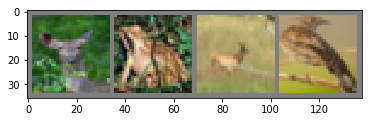

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(''.join('%5s' % classes[labels[j]] for j in range(4)))

### 2.2 Define a Convolution Neural Network

从神经网络部分复制神经网络, 并修改它以获取 3 通道图像(而不是定义的 1 通道图像).

In [90]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

### 2.3 Define a Loss function and optimizer

我们使用交叉熵损失函数( CrossEntropyLoss )和随机梯度下降( SGD )优化器.

In [91]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # It is useful when training a classification problem with C classes
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 2.4 Train the network

这是事情开始变得有趣的时候. 我们只需循环遍历数据迭代器, 并将输入提供给网络和优化器.

In [94]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # get the inputs
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i%2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
            
print('Finished training')

[1,  2000] loss: 2.225
[1,  4000] loss: 1.841
[1,  6000] loss: 1.683
[1,  8000] loss: 1.591
[1, 10000] loss: 1.496
[1, 12000] loss: 1.477
[2,  2000] loss: 1.396
[2,  4000] loss: 1.368
[2,  6000] loss: 1.341
[2,  8000] loss: 1.318
[2, 10000] loss: 1.308
[2, 12000] loss: 1.285
Finished training


### 2.5 Test the network on the test data

我们在训练数据集上训练了2遍网络, 但是我们需要检查网络是否学到了什么.

我们将通过预测神经网络输出的类标签来检查这个问题, 并根据实际情况进行检查. 如果预测是正确的, 我们将样本添加到正确预测的列表中.

好的, 第一步. 让我们显示测试集中的图像以便熟悉.

GroundTruth:  truck  truck   deer    dog 


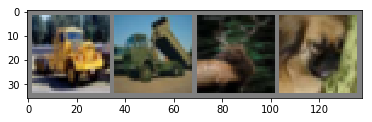

In [95]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s ' % classes[labels[j]] for j in range(4)))

好的, 现在让我们看看神经网络认为这些例子是什么:

In [96]:
outputs = net(Variable(images))

In [97]:
outputs

Variable containing:
-1.5766  5.8518 -2.8199 -0.7995 -3.8474 -1.7429  1.0140 -3.4272 -1.3595  7.4869
 0.5550 -0.4066 -1.0618  0.7625 -0.5766 -0.3012 -0.7758  0.2896 -0.8108  2.3638
-0.5015 -1.1385  1.2889  0.3613  2.1235  0.0498  1.4985 -0.1753 -0.9031 -1.4824
-2.5734 -2.4960  1.5330  1.9933  1.4879  2.8868  2.6786  1.9077 -3.7640 -3.0354
[torch.FloatTensor of size 4x10]

输出的是10个类别的能量. 一个类别的能量越高, 则可以理解为网络认为越多的图像是该类别的. 那么, 让我们得到最高能量的索引:

In [98]:
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s ' % classes[predicted[j]] for j in range(4)))

Predicted:  truck  truck   deer    dog 


结果看起来不错.

让我们看看网络如何在整个数据集上执行.

In [100]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


训练的准确率远比随机猜测(准确率10%)好, 证明网络确实学到了东西.

嗯, 我们来看看哪些类别表现良好, 哪些类别表现不佳:

In [106]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze() # Returns a tensor with all the dimensions of input of size 1 removed.
    
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 48 %
Accuracy of  bird : 32 %
Accuracy of   cat : 33 %
Accuracy of  deer : 42 %
Accuracy of   dog : 57 %
Accuracy of  frog : 72 %
Accuracy of horse : 69 %
Accuracy of  ship : 63 %
Accuracy of truck : 71 %


好的, 接下来呢?

我们如何在 GPU 上运行这些神经网络?

### 3 Training on GPU

就像你如何将一个张量传递给GPU一样, 你将神经网络转移到GPU上. 这将递归遍历所有模块, 并将其参数和缓冲区转换为CUDA张量:

In [108]:
net.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

请记住, 您必须将输入和目标每一步都发送到GPU:

In [ ]:
inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

如果发现在 GPU 上并没有比 CPU 提速很多, 实际上是因为网络比较小, GPU 没有完全发挥自己的真正实力.

练习: 尝试增加网络的宽度(第一个 nn.Conv2d 的参数2和第二个 nn.Conv2d 的参数1 它们需要是相同的数字), 看看你得到什么样的加速.

目标达成:
- 深入了解PyTorch的张量库和神经网络.
- 训练一个小的神经网络来分类图像.

### 4 Training on multiple GPUs

如果你希望使用所有 GPU 来看更多的 MASSIVE 加速, 请查看可选 可选: 数据并行 http://pytorch.apachecn.org/cn/tutorials/beginner/blitz/data_parallel_tutorial.html

###  5 Where do I go next?

- 训练神经网络玩电子游戏
- 在 imagenet 上培训最先进的 ResNet 网络
- 利用生成对抗网络训练人脸生成器
- 使用 Recurrent LSTM 网络训练单词语言模型
- 更多的例子
- 更多教程
- 在论坛上讨论 PyTorch
- 与 Slack 上与其他用户聊天

## Optional: Data Parallelism

在这个教程中, 我们将会学习如何在多个GPU上使用 DataParallel .

在 PyTorch 中使用 GPU 是一件很容易的事情.你可以像下面这样轻松的将一个模型分配到一个 GPU 上.

In [ ]:
model.gpu()

随后, 你可以将你的所有张量拷贝到上面的GPU:

In [ ]:
mytensor = my_tensor.gpu()

此处请注意: 如果只是调用 mytensor.gpu() 是不会将张量拷贝到 GPU 的.你需要将它赋给一个 新的张量, 这个张量就能在 GPU 上使用了.

在多个 GPU 上运行前向、反向传播是一件很自然的事情, 然而, PyTorch 默认情况下只会用到一个GPU, 可以通过使用 DataParallel 使你的模型并行运行, 在多个GPU上运行这些操作也将变得非常简单:

In [ ]:
model = nn.DataParallel(model)b

这是教程的核心内容, 我们将在随后进行详细讲解

### 1 Imports and parameters

导入PyTorch模块和参数定义

In [120]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

# Parameters and DataLoaders
input_size = 5
output_size = 2

batch_size = 32
data_size = 100

### 2 Dummy DataSet

只需要实现 getitem 就可以轻松的生成一个（随机）伪数据集, 如下代码所示:

In [121]:
class RandomDataSet(Dataset):
    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)
        
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return self.len
    
rand_loader = DataLoader(dataset=RandomDataSet(input_size, data_size), batch_size=batch_size, shuffle=True)

### 3 Simple Model

在下面的示例中, 我们的模型只需要一个输入并且完成一个线性操作, 最后得 到一个输出.当然, 你可以在任意模型 (CNN,RNN,Capsule Net等) 运用 DataParallel

我们在模型中设置了打印指令来监控输入和输出的张量大小, Please pay attention to what is printed at batch rank 0.

In [122]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        
    def forward(self, input):
        output = self.fc(input)
        print(" In Model: input size", input.size(), "output size", output.size())
        return output

### 4 Create Model and DataParallel

这是本教程的核心部分. 首先, 我们需要生成一个模型的实例并且检测我们是否拥有多个 GPU.如果有多个GPU , 我们可以使用 nn.DataParallel 来包装我们的模型, 然后我们 就可以将我们的模型通过 model.gpu() 施加于这些GPU上.

In [123]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    
    # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
    model = nn.DataParallel(model)
    
if torch.cuda.is_available():
    model.cuda()

Let's use 4 GPUs!


### 5 Run the Model

现在我们可以看到输入和输出张量的大小了.

In [124]:
for data in rand_loader:
    if torch.cuda.is_available():
        input_var = Variable(data.cuda())
    else:
        input_var = Variable(data)
    output = model(input_var)
    print("Outside: input size", input_var.size(),
          "output_size", output.size())

C:\Users\hasun\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\torch\cuda\nccl.py:27: UserWarning: PyTorch is not compiled with NCCL support
  warnings.warn('PyTorch is not compiled with NCCL support')


 In Model: input size In Model: input size In Model: input size In Model: input size    torch.Size([8, 5])torch.Size([8, 5])torch.Size([8, 5])torch.Size([8, 5])    output sizeoutput sizeoutput sizeoutput size    torch.Size([8, 2])torch.Size([8, 2])torch.Size([8, 2])torch.Size([8, 2])



Outside: input size torch.Size([32, 5]) output_size torch.Size([32, 2])
 In Model: input size In Model: input size  In Model: input size In Model: input size torch.Size([8, 5])  torch.Size([8, 5])torch.Size([8, 5]) torch.Size([8, 5])  output size output sizeoutput size output size torch.Size([8, 2])  
torch.Size([8, 2])torch.Size([8, 2])torch.Size([8, 2])


Outside: input size torch.Size([32, 5]) output_size torch.Size([32, 2])
 In Model: input size In Model: input size  In Model: input size In Model: input size  torch.Size([8, 5]) torch.Size([8, 5])torch.Size([8, 5]) torch.Size([8, 5]) output size  output size output sizeoutput size torch.Size([8, 2])  torch.Size([8, 2])
torch.Size([8, 2])torch.Size([8

### 6 Summary

DataParallel 自动地将数据分割并且将任务送入多个GPU上的多个模型中进行处理. 在每个模型完成任务后, DataParallel 采集和合并所有结果, 并将最后的结果呈现给你.